In [2]:
import pandas as pd
import numpy as np

file = '../data/tastdb-exp-2020.sav'

df = pd.read_spss(file)

In [3]:
df.head()

,VOYAGEID,ADLT1IMP,ADLT2IMP,ADLT3IMP,ADPSALE1,ADPSALE2,ADULT1,ADULT2,ADULT3,ADULT4,...,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS,YRREG,filter_$
0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,years 1816-20,years 1811-20,years 1801-25,1800.0,1816.0,1817.0,1816.0,NaN,NaN,Not Selected
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,years 1816-20,years 1811-20,years 1801-25,1800.0,1817.0,1817.0,1816.0,NaN,NaN,Not Selected
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,years 1816-20,years 1811-20,years 1801-25,1800.0,1817.0,1817.0,1816.0,NaN,NaN,Not Selected
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,years 1816-20,years 1811-20,years 1801-25,1800.0,1817.0,1817.0,1816.0,NaN,NaN,Not Selected
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,years 1816-20,years 1811-20,years 1801-25,1800.0,1817.0,1817.0,1817.0,NaN,NaN,Not Selected


In [4]:
df[['SHIPNAME', 'NATIONAL']].value_counts()

SHIPNAME                  NATIONAL     
                          Great Britain    243
                          USA              234
Mary                      Great Britain    196
Nancy                     Great Britain    142
                          Portugal         113
                                          ... 
Johan van Oldenbarneveld  Netherlands        1
Joceline                  Great Britain      1
Joana                     Portugal           1
Joachim                   France             1
Órion                     USA                1
Length: 8440, dtype: int64

In [6]:
child1 = df['CHILD1']

print(child1.min(), child1.max())

1.0 271.0


In [18]:
print(child1.value_counts(bins=[1, 91, 181, 271]))

(0.999, 91.0]     515
(91.0, 181.0]      17
(181.0, 271.0]      2
Name: CHILD1, dtype: int64


In [17]:
bins = {"1-90": 0, "91-180": 0, "181-271":0 }

for c in child1:
    if not np.isnan(c):
        if c <= 91:
            bins["1-90"] = bins["1-90"] + 1
        elif c <= 181:
            bins["91-180"] = bins["91-180"] + 1
        else:
            bins["181-271"] = bins["181-271"] + 1

print(bins)

{'1-90': 515, '91-180': 17, '181-271': 2}


<Axes: ylabel='Frequency'>

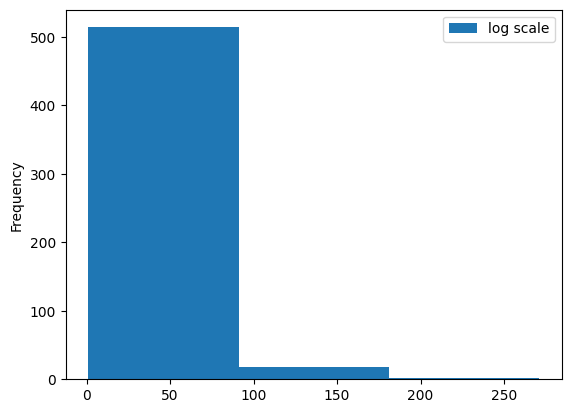

In [25]:
child1.plot.hist(bins=[1, 91, 181, 271], label="log scale", legend=True)